In [13]:
import pandas as pd #importing librarries and data
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../data/cleaned_climate_data.csv")
df.head()

,Area,Item,Year,Avg_rainfall,Pesticides(tonnes),Avg_Temp,Crop_Yield(hectares)
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,Rice,1990,1485,121.0,16.37,23333
3,Albania,Paddy,1990,1485,121.0,16.37,23333
4,Albania,Sorghum,1990,1485,121.0,16.37,12500


In [ ]:
print(df.info()) #taking a quick idea of the cleaned data
print(df.describe())
print(df.isna().sum())
print(df['Item'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29023 entries, 0 to 29022
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  29023 non-null  object 
 1   Item                  29023 non-null  object 
 2   Year                  29023 non-null  int64  
 3   Avg_rainfall          29023 non-null  int64  
 4   Pesticides(tonnes)    29023 non-null  float64
 5   Avg_Temp              29023 non-null  float64
 6   Crop_Yield(hectares)  29023 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.6+ MB
None
               Year  Avg_rainfall  Pesticides(tonnes)      Avg_Temp  \
count  29023.000000  29023.000000        29023.000000  29023.000000   
mean    2001.548668   1151.287186        34796.569317     20.502969   
std        7.057882    720.400467        57068.959753      6.382423   
min     1990.000000     51.000000            0.040000      1.300000   
25%     199

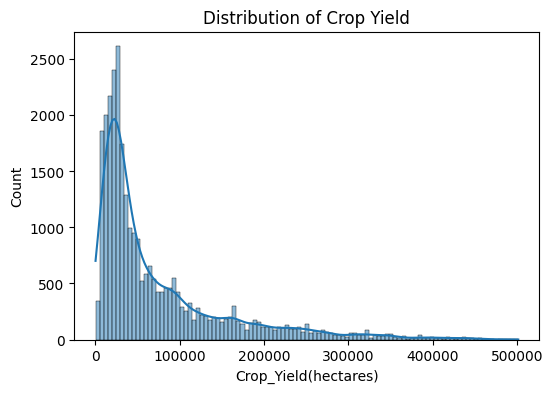

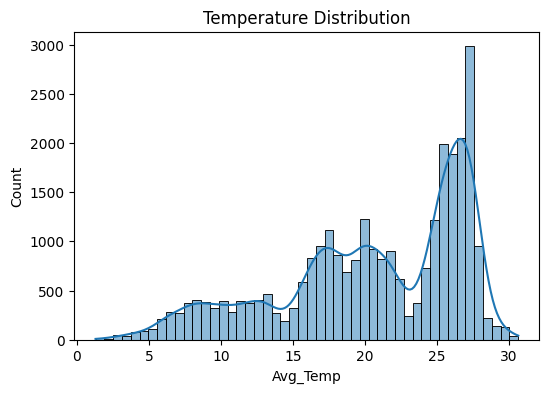

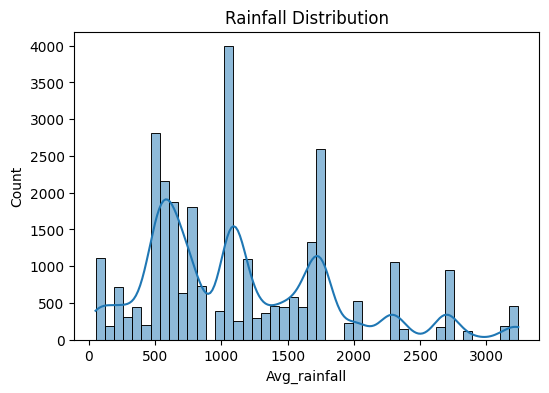

In [ ]:
#univariate analysis for the specific columns.
plt.figure(figsize=(6,4)) 
sns.histplot(df['Crop_Yield(hectares)'], kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Temp'], kde=True)
plt.title("Temperature Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Avg_rainfall'], kde=True)
plt.title("Rainfall Distribution")
plt.show()


<Axes: xlabel='Avg_rainfall', ylabel='Crop_Yield(hectares)'>

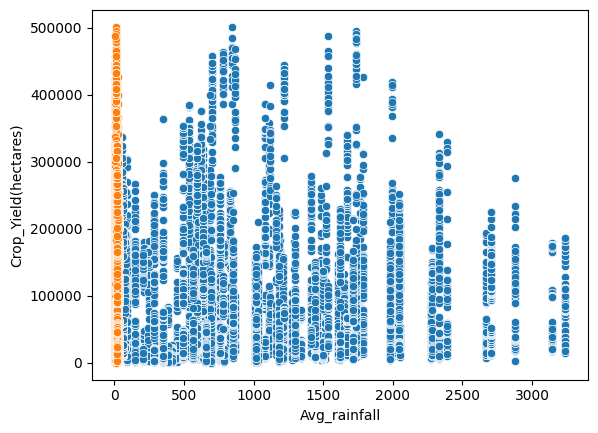

In [6]:
#bivariate analysis for the specific columns. here we are checking relationship of rainfall and temp with crop yield
sns.scatterplot(data=df, x='Avg_rainfall', y='Crop_Yield(hectares)')
sns.scatterplot(data=df, x='Avg_Temp', y='Crop_Yield(hectares)')

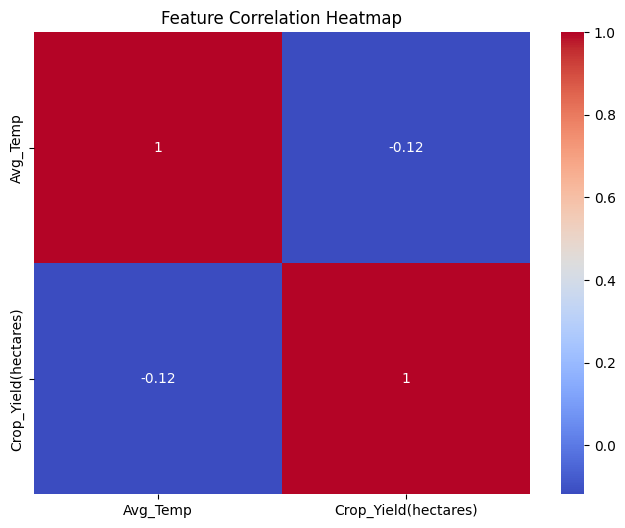

In [ ]:
#figuring out the correlationbw some temp and crop yield.
plt.figure(figsize=(8,6)) 

sns.heatmap(df[['Avg_Temp', 'Crop_Yield(hectares)']].select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


<Axes: xlabel='Year', ylabel='Avg_rainfall'>

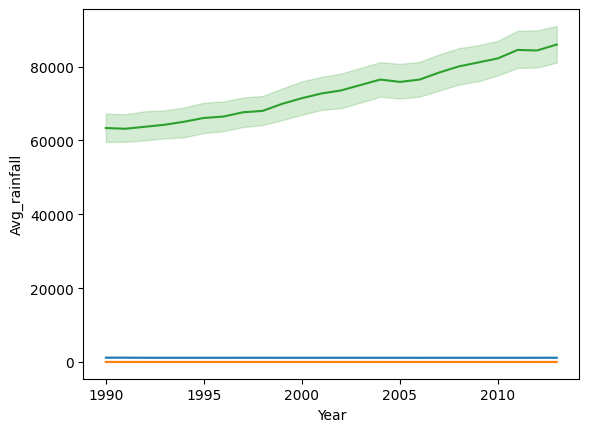

In [18]:
sns.lineplot(data=df, x='Year', y='Avg_rainfall')
sns.lineplot(data=df, x='Year', y='Avg_Temp')
sns.lineplot(data=df, x='Year', y='Crop_Yield(hectares)')

In [20]:
df.groupby('Area')['Crop_Yield(hectares)'].mean().sort_values(ascending=False).head(10)


Area
United Kingdom    240956.478261
Belgium           216468.461538
Denmark           214033.020000
Netherlands       204151.202899
Ireland           197913.695652
New Zealand       191931.826087
Sweden            187405.500000
Bahrain           153237.551724
Norway            146115.326087
Switzerland       144960.282609
Name: Crop_Yield(hectares), dtype: float64

In [22]:
summary = df.groupby('Item')[['Avg_Temp', 'Avg_rainfall', 'Crop_Yield(hectares)']].mean()
summary.to_csv("../data/summary_stats.csv")
